In [70]:
# 导入工具包
import networkx as nx
import seaborn as sns

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='white')
sns.set_palette(['#046586', '#28A9A1', '#C9A77C', '#F4A016', '#F6BBC6', '#E71F19'])  # Nature 配色
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (5, 4)  # 2.24, 2.24 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 300  # 图片像素
plt.rcParams['figure.dpi'] = 100  # 分辨率
plt.rcParams['font.sans-serif'] = 'SimHei'  # 显示中文
# plt.rcParams['font.sans-serif'] = 'Times New Roman'  # 论文插图用
# 设置正常显示字符
plt.rcParams['axes.unicode_minus'] = False  #正常显示负号
# plt.rcParams['font.size'] = 60

### 经典图结构
#### 全连接无向图

In [10]:
G = nx.complete_graph(7)

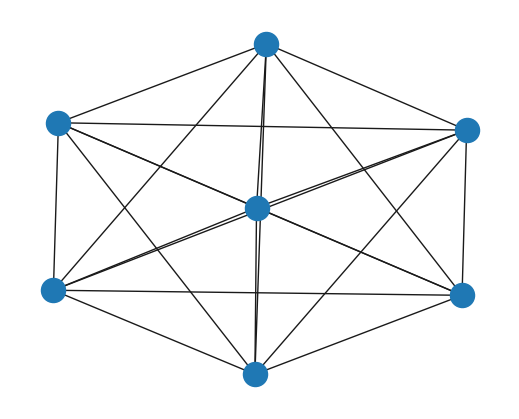

In [11]:
nx.draw(G)

In [12]:
# 全图连接数
G.size()

21

#### 全连接有向图

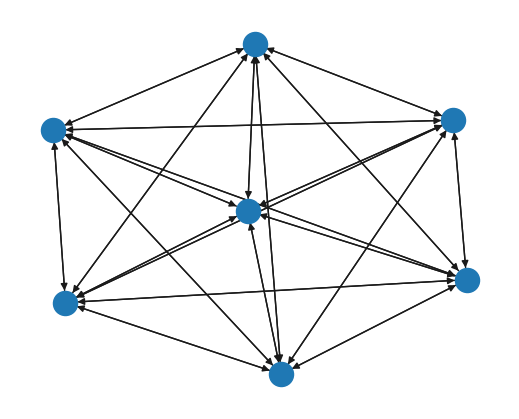

In [13]:
G = nx.complete_graph(7, nx.DiGraph())
nx.draw(G)

In [14]:
G.is_directed()

True

#### 环状图

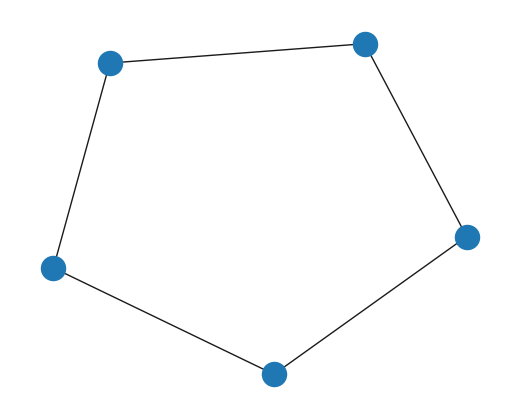

In [17]:
G = nx.cycle_graph(5)
nx.draw(G)

#### 梯状图

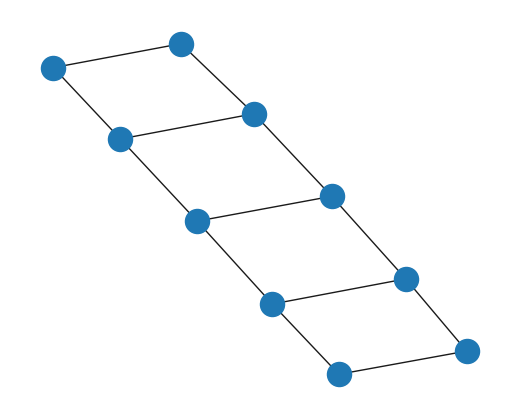

In [19]:
G = nx.ladder_graph(5)
nx.draw(G)

#### 线性串珠图

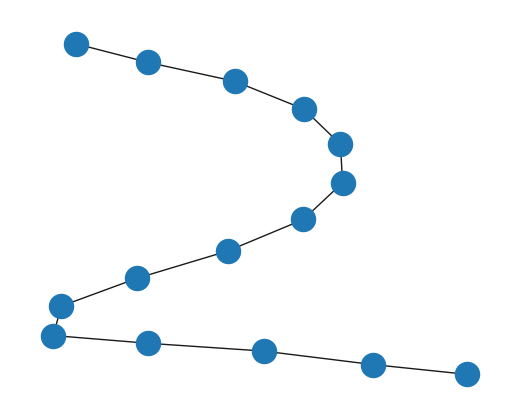

In [23]:
G = nx.path_graph(15)
nx.draw(G)

#### 星状图

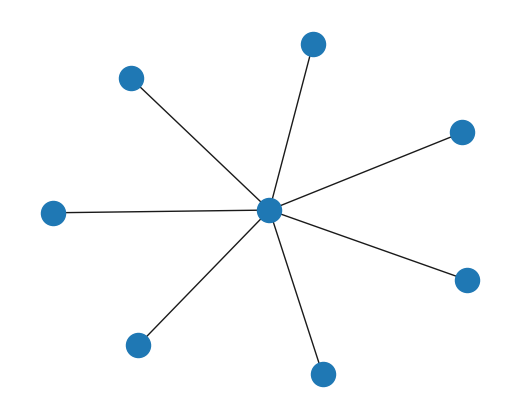

In [25]:
G = nx.star_graph(7)
nx.draw(G)

#### 轮辐图

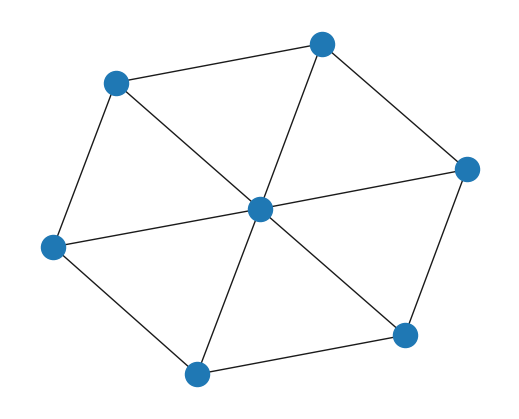

In [27]:
G = nx.wheel_graph(7)
nx.draw(G)

#### 二项树

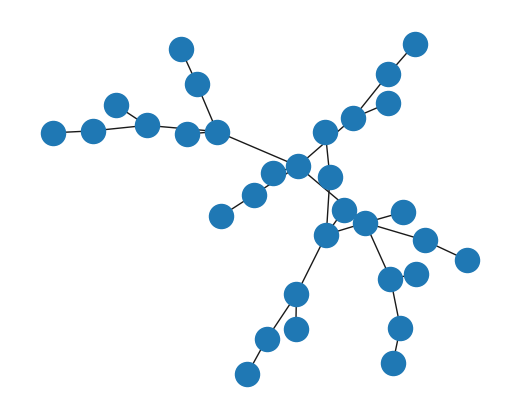

In [29]:
G = nx.binomial_tree(5)
nx.draw(G)

### 栅格图
#### 二维矩形网格图

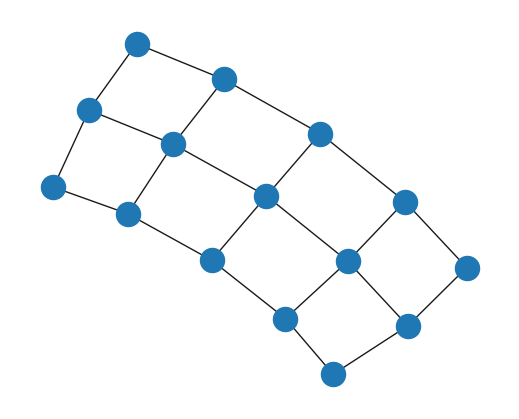

In [31]:
G = nx.grid_2d_graph(3, 5)
nx.draw(G)

#### 多维矩形网格图

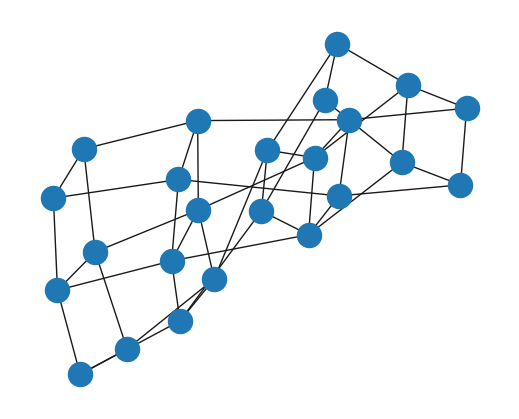

In [34]:
G = nx.grid_graph(dim=(2, 3, 4))
nx.draw(G)

#### 二维三角形网格图

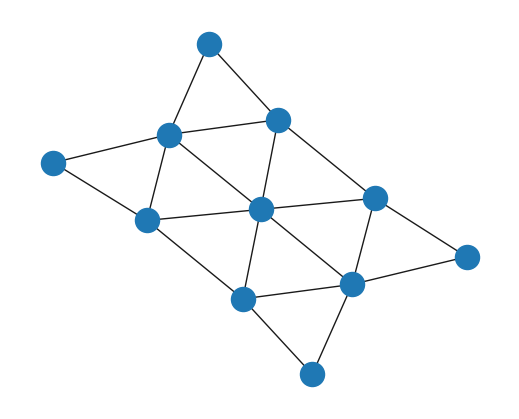

In [36]:
G = nx.triangular_lattice_graph(2, 5)
nx.draw(G)

#### 二维六边形蜂窝图

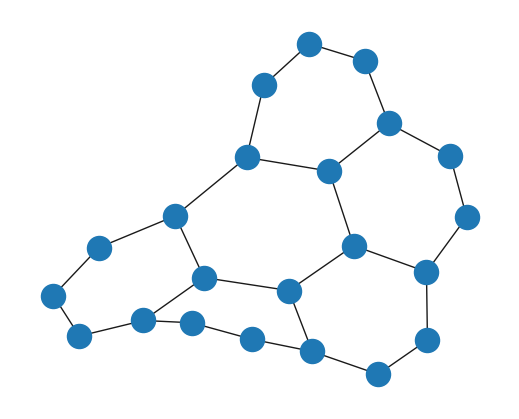

In [38]:
G = nx.hexagonal_lattice_graph(2, 3)
nx.draw(G)

#### n维超立方体图

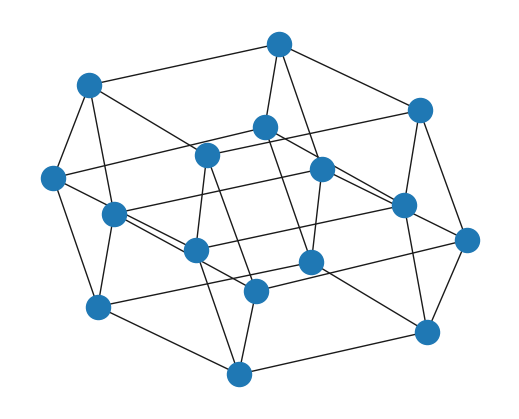

In [40]:
G = nx.hypercube_graph(4)
nx.draw(G)

### NetworkX内置图

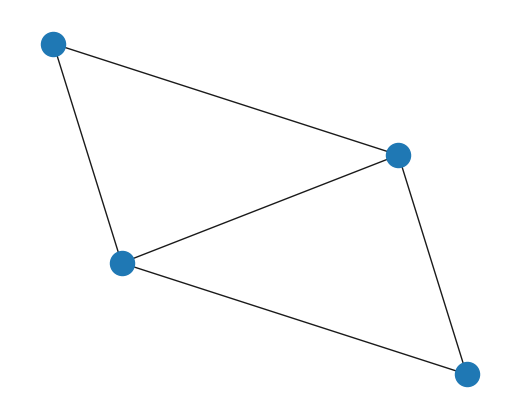

In [44]:
G = nx.diamond_graph() ## 钻石图
nx.draw(G)

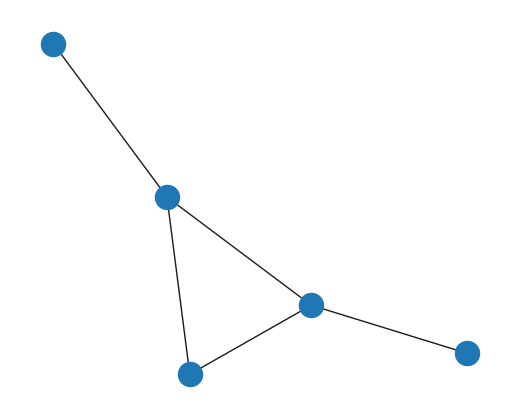

In [45]:
G = nx.bull_graph() ## 牛角图
nx.draw(G)

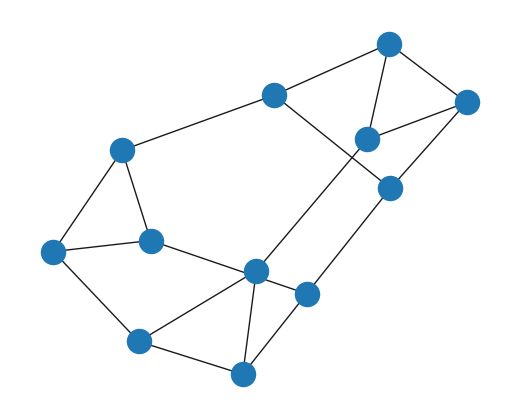

In [46]:
G = nx.frucht_graph()
nx.draw(G)

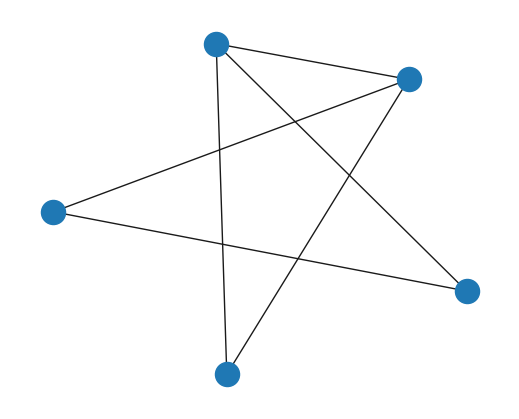

In [47]:
G = nx.house_graph()
nx.draw(G)

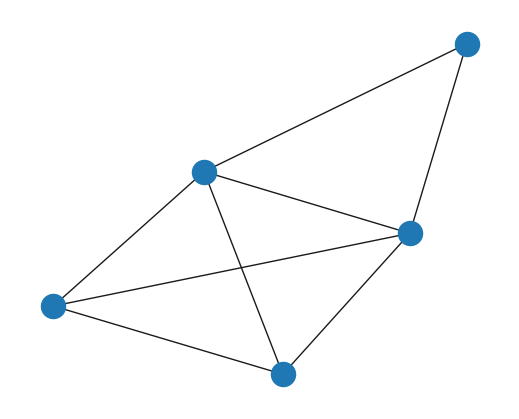

In [48]:
G = nx.house_x_graph()
nx.draw(G)

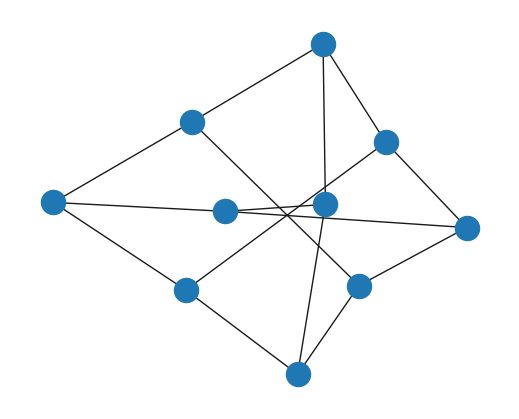

In [49]:
G = nx.petersen_graph()
nx.draw(G)

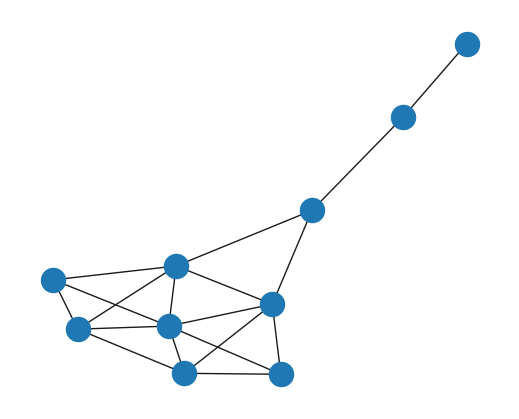

In [50]:
G = nx.krackhardt_kite_graph()
nx.draw(G)

### 随机图

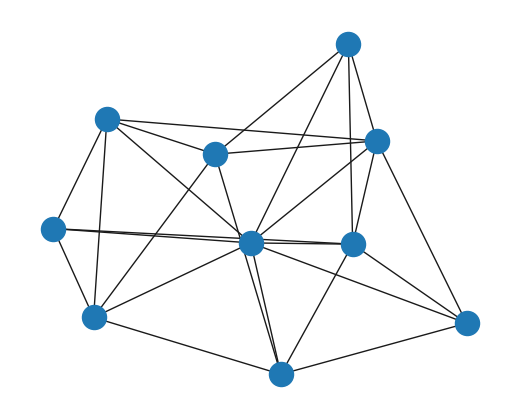

In [52]:
G = nx.erdos_renyi_graph(10, 0.5)
nx.draw(G)

### 有向图
#### 无标度有向图

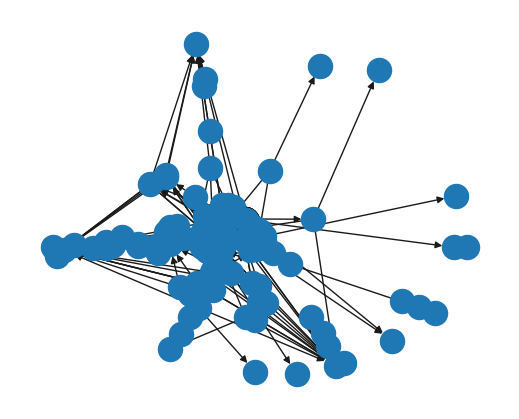

In [54]:
G = nx.scale_free_graph(100)
nx.draw(G)

### 社交网络

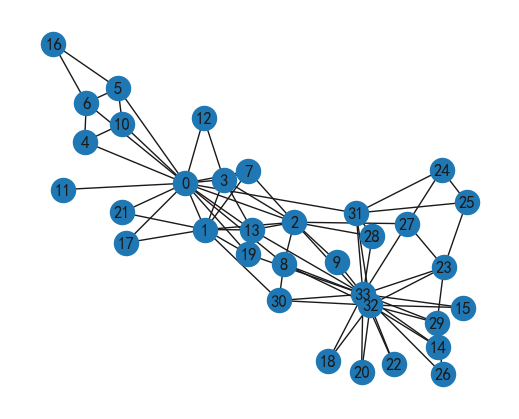

In [57]:
# 空手道俱乐部数据集
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

In [58]:
G.nodes[5]['club']

'Mr. Hi'

In [59]:
G.nodes[9]['club']

'Officer'

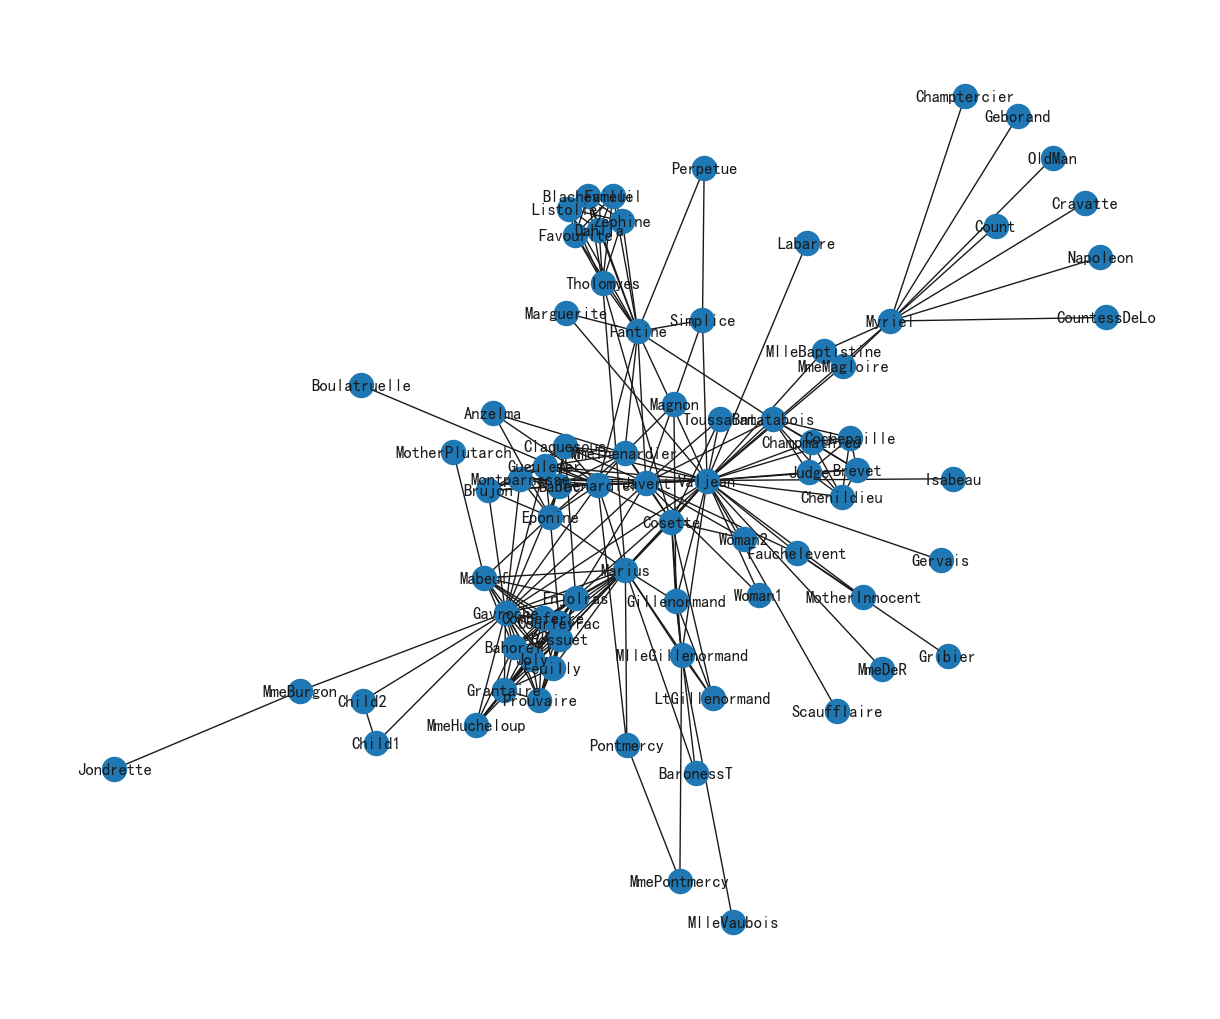

In [61]:
# 雨果《悲惨世界》人物关系
G = nx.les_miserables_graph()
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos, with_labels=True)

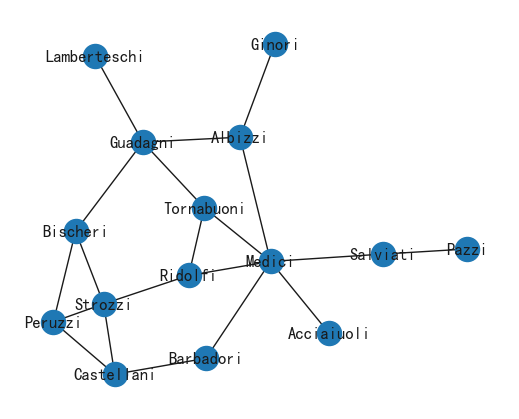

In [63]:
# Florentine families graph
G = nx.florentine_families_graph()
nx.draw(G, with_labels=True)

### 社群聚类图

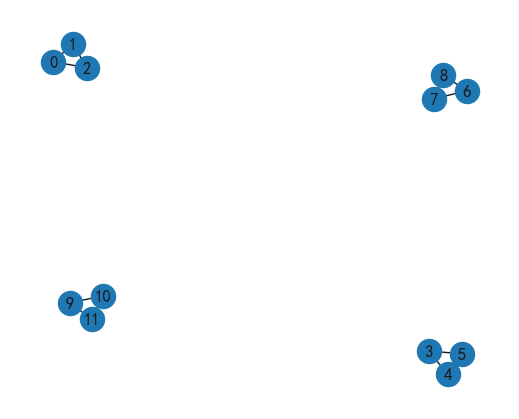

In [65]:
G = nx.caveman_graph(4, 3)
nx.draw(G, with_labels=True)

### 树

In [69]:
tree = nx.random_tree(n=10, seed=8)
print(nx.forest_str(tree, sources=[6]))  ## source是根？

╙── 6
    ├── 5
    │   └── 7
    └── 2
        ├── 1
        │   └── 0
        │       └── 3
        │           ├── 4
        │           └── 8
        └── 9


### 导入三元组连接表

In [72]:
# 导入csv文件定义的三元组连接表，构建有向图
df = pd.read_csv(r'./data/triples.csv')
df

head tail               relation label
0     关羽   刘备  younger_sworn_brother    义弟
1     张飞   刘备  younger_sworn_brother    义弟
2     关羽   张飞    elder_sworn_brother    义兄
3     张苞   张飞                    son    儿子
4     关兴   关羽                    son    儿子
..   ...  ...                    ...   ...
148   曹植   曹丕        younger_brother    弟弟
149   马谡  诸葛亮              colleague    同事
150   马谡   刘备               minister     臣
151   孙坚   孙权                 father    父亲
152  吴国太   孙权                 mother    母亲

[153 rows x 4 columns]

### 通过连接表Edge List创建图

In [74]:
G = nx.DiGraph()

In [75]:
edges = [edge for edge in zip(df['head'], df['tail'])]
G.add_edges_from(edges)

In [80]:
G.edges('关羽')

OutEdgeDataView([('关羽', '刘备'), ('关羽', '张飞')])

### 可视化

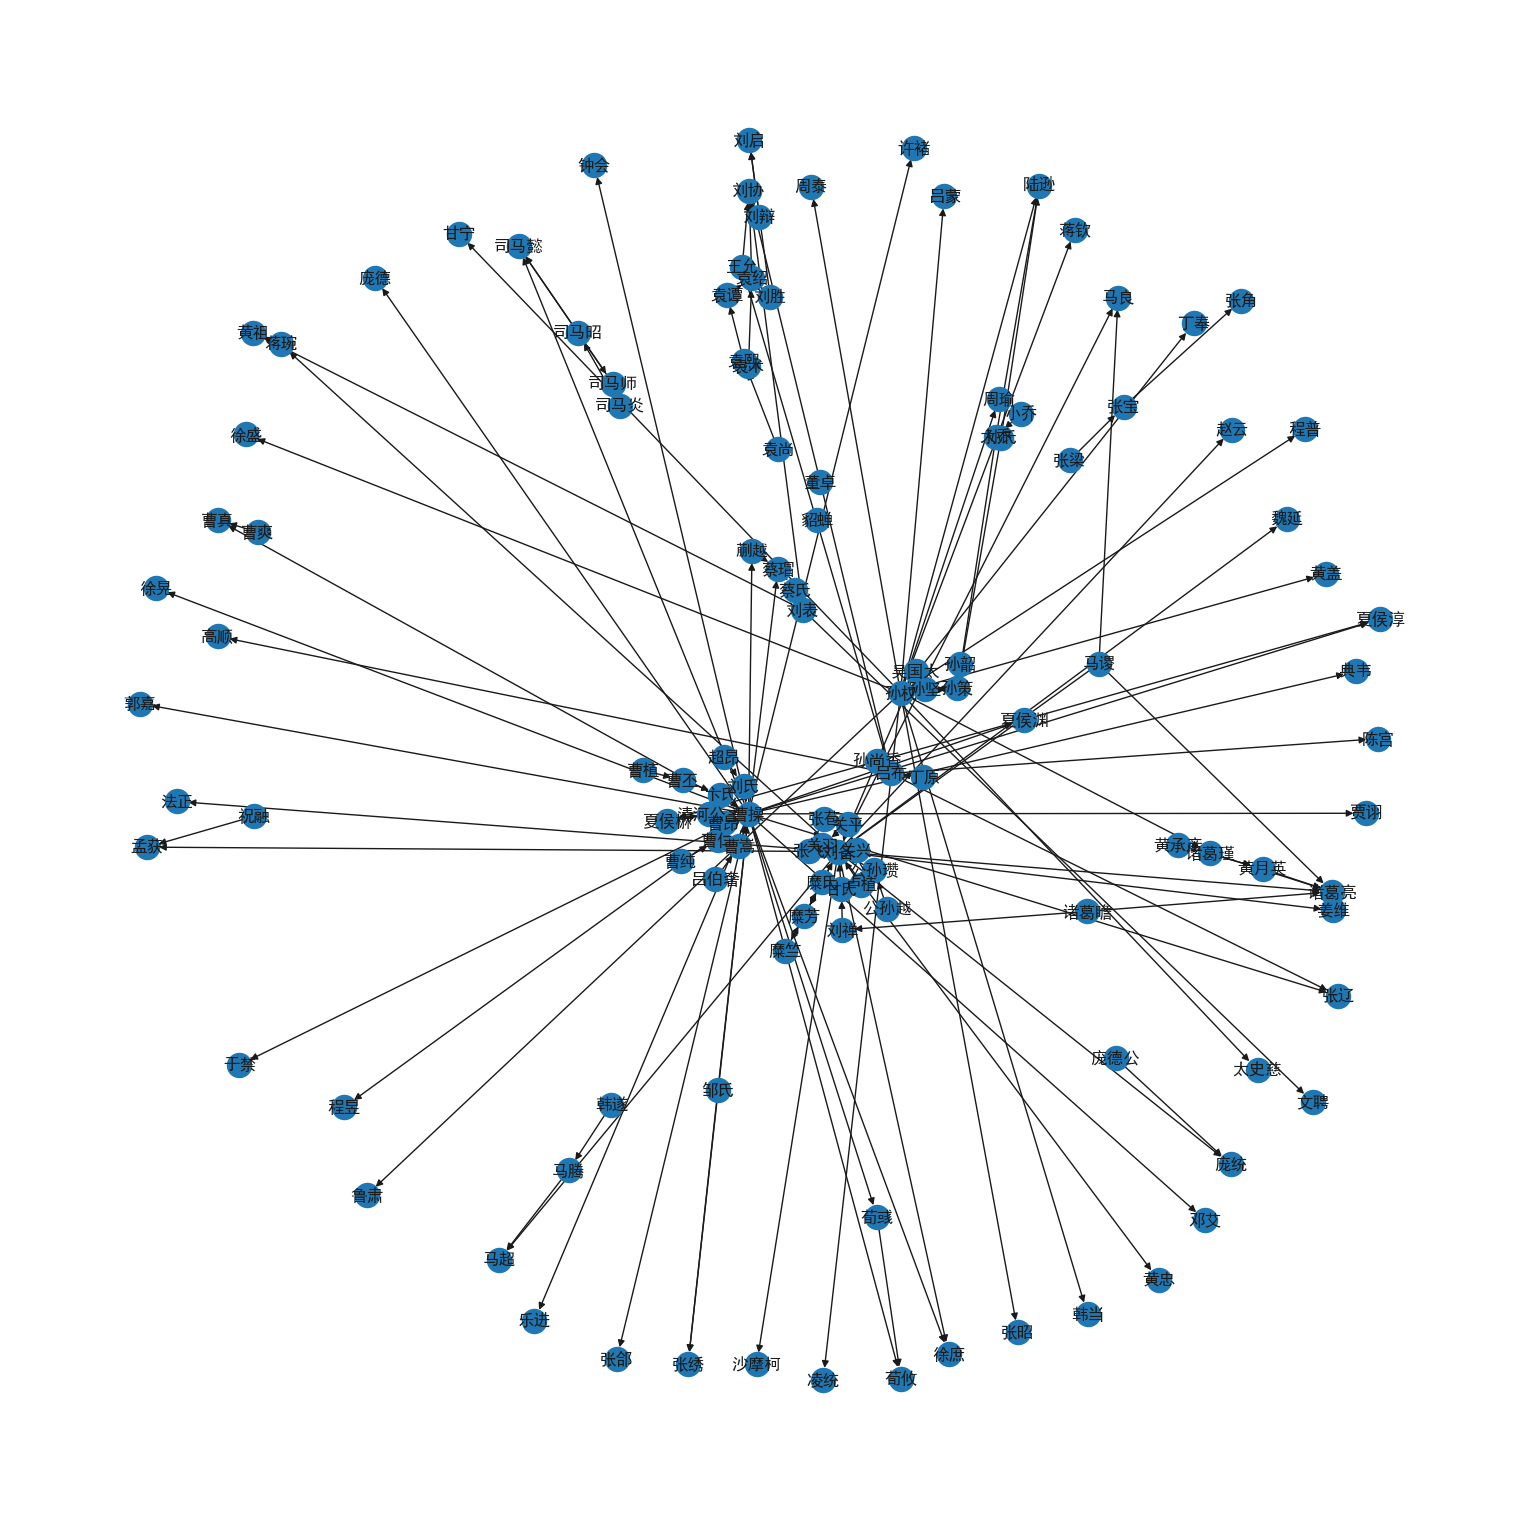

In [82]:
# 结点排版布局-默认弹簧布局
pos = nx.spring_layout(G, seed=123)
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True)

### 查看全图参数

In [84]:
print(G)

DiGraph with 123 nodes and 144 edges


In [85]:
len(G)

123

In [86]:
G.size()

144

In [88]:
G.nodes

NodeView(('关羽', '刘备', '张飞', '张苞', '关兴', '关平', '卢植', '公孙瓒', '甘氏', '刘禅', '诸葛瞻', '诸葛亮', '姜维', '黄月英', '黄承彦', '诸葛瑾', '公孙越', '马超', '马腾', '韩遂', '徐庶', '曹操', '刘胜', '刘启', '刘辩', '孙权', '孙尚香', '糜氏', '糜芳', '糜竺', '魏延', '赵云', '黄忠', '庞统', '法正', '蒋琬', '马良', '孟获', '沙摩柯', '庞德公', '马谡', '祝融', '孙韶', '孙策', '孙氏', '陆逊', '刘协', '董卓', '王允', '貂蝉', '吕布', '丁原', '高顺', '陈宫', '张辽', '刘表', '蔡氏', '蔡瑁', '蒯越', '黄祖', '文聘', '张宝', '张角', '张梁', '袁绍', '袁术', '袁谭', '袁熙', '袁尚', '吴国太', '孙坚', '大乔', '小乔', '周瑜', '丁奉', '徐盛', '鲁肃', '张昭', '蒋钦', '太史慈', '周泰', '凌统', '吕蒙', '甘宁', '黄盖', '韩当', '程普', '曹嵩', '吕伯奢', '邹氏', '张绣', '清河公主', '夏侯楙', '夏侯渊', '夏侯淳', '曹真', '曹爽', '郭嘉', '徐晃', '乐进', '张郃', '许褚', '典韦', '荀彧', '荀攸', '贾诩', '司马懿', '程昱', '于禁', '邓艾', '钟会', '庞德', '司马师', '司马昭', '司马炎', '曹仁', '曹纯', '曹昂', '刘氏', '超昂', '卞氏', '曹丕', '曹植'))

In [89]:
### 保存并载入邻接表Adjacency List

In [93]:
for line in nx.generate_adjlist(G):
    print(line)

关羽 刘备 张飞
刘备 诸葛亮 马超 徐庶 姜维 糜芳 糜竺 魏延 赵云 黄忠 庞统 法正 蒋琬 马良 孟获 沙摩柯
张飞 刘备
张苞 张飞
关兴 关羽
关平 张苞 关羽
卢植 刘备
公孙瓒 刘备
甘氏 刘备
刘禅 甘氏
诸葛瞻 刘禅 诸葛亮
诸葛亮 姜维
姜维 诸葛亮
黄月英 诸葛亮
黄承彦 黄月英
诸葛瑾 诸葛亮
公孙越 公孙瓒
马超
马腾 马超
韩遂 马腾
徐庶
曹操 徐庶 张辽 蒯越 蔡瑁 张绣 夏侯淳 夏侯渊 曹真 郭嘉 徐晃 乐进 张郃 许褚 典韦 荀彧 荀攸 贾诩 司马懿 程昱 于禁 邓艾 钟会 庞德
刘胜 刘启
刘启
刘辩 刘启
孙权 诸葛瑾 孙策 周瑜 陆逊 丁奉 徐盛 鲁肃 张昭 蒋钦 太史慈 周泰 凌统 吕蒙 甘宁 黄盖 韩当 程普
孙尚香 刘备 吴国太
糜氏 刘备
糜芳 糜氏
糜竺 糜芳
魏延
赵云
黄忠
庞统
法正
蒋琬
马良
孟获
沙摩柯
庞德公 庞统
马谡 马良 诸葛亮 刘备
祝融 孟获
孙韶 孙策
孙策 孙坚
孙氏 陆逊 孙策
陆逊
刘协 刘辩
董卓 刘协 吕布
王允 刘协
貂蝉 王允 吕布
吕布 高顺 陈宫 张辽
丁原 吕布
高顺
陈宫
张辽
刘表 刘协 黄祖 文聘
蔡氏 刘表
蔡瑁 蔡氏
蒯越 蔡瑁
黄祖
文聘
张宝 张角
张角
张梁 张宝
袁绍 刘协
袁术 袁绍
袁谭 袁绍
袁熙 袁谭
袁尚 袁熙
吴国太 孙坚 孙权
孙坚 孙权
大乔 孙策 陆逊
小乔 大乔
周瑜 小乔
丁奉
徐盛
鲁肃
张昭
蒋钦
太史慈
周泰
凌统
吕蒙
甘宁
黄盖
韩当
程普
曹嵩 曹操
吕伯奢 曹嵩
邹氏 曹操 张绣
张绣
清河公主 曹操
夏侯楙 清河公主
夏侯渊 夏侯楙 夏侯淳
夏侯淳
曹真
曹爽 曹真
郭嘉
徐晃
乐进
张郃
许褚
典韦
荀彧 荀攸
荀攸
贾诩
司马懿
程昱
于禁
邓艾
钟会
庞德
司马师 司马懿
司马昭 司马师 司马懿
司马炎 司马昭
曹仁 曹操
曹纯 曹仁
曹昂 曹操
刘氏 曹操
超昂 刘氏
卞氏 曹操
曹丕 卞氏
曹植 曹丕


In [94]:
# 将邻接表导出为本地文件 grid.edgelist
nx.write_edgelist(G, path=r'data/grid.edgelist', delimiter=":")

In [95]:
# 从本地文件 grid.edgelist 读取邻接表
H = nx.read_edgelist(path=r'data/grid.edgelist', delimiter=":")

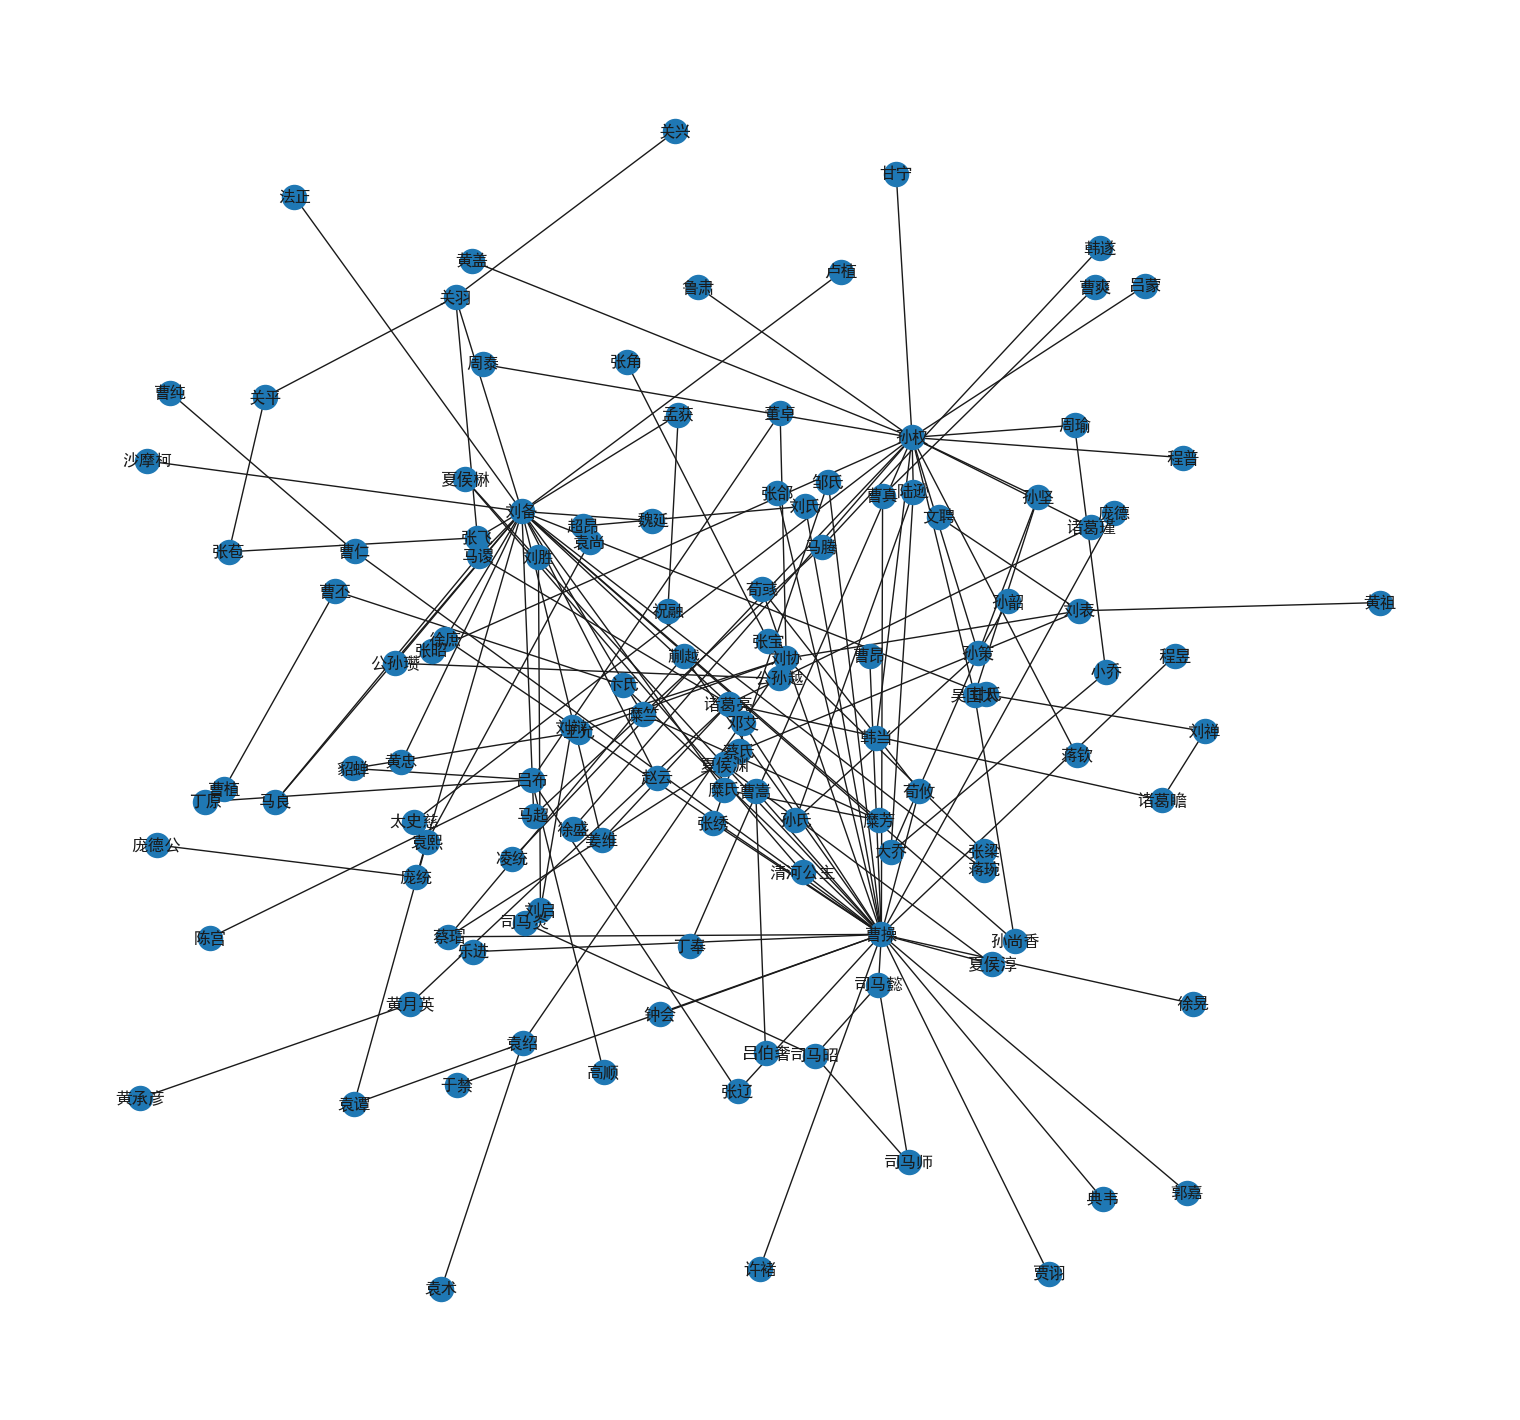

In [96]:
# 可视化
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(H, iterations=3, seed=5)
nx.draw(H, pos, with_labels=True)
plt.show()

### 创建结点

In [98]:
import networkx as nx

#### 创建无结点，无连接的空图

In [100]:
G = nx.Graph()

In [101]:
G

In [102]:
G.nodes

NodeView(())

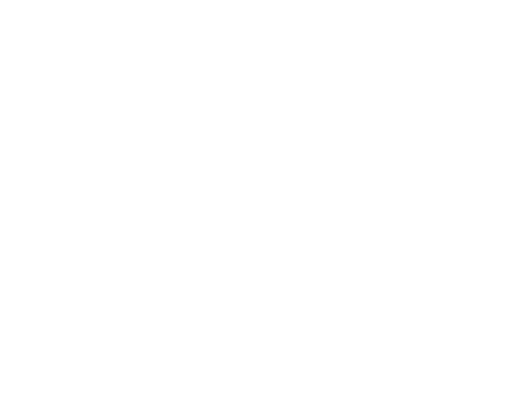

In [104]:
# 可视化
nx.draw(G)  ## 可以看到是空的

### 添加单个结点

In [106]:
G.add_node('刘备')

In [107]:
G.nodes

NodeView(('刘备',))

In [108]:
G.add_node('Tommy')

In [109]:
G.nodes

NodeView(('刘备', 'Tommy'))

In [111]:
G.add_node(1)

In [112]:
G.nodes

NodeView(('刘备', 'Tommy', 1))

In [113]:
### 添加多个结点

In [114]:
G.add_nodes_from(['诸葛亮', '曹操'])

In [115]:
G.nodes

NodeView(('刘备', 'Tommy', 1, '诸葛亮', '曹操'))

In [116]:
G.add_nodes_from(range(100,105))

In [117]:
G.nodes

NodeView(('刘备', 'Tommy', 1, '诸葛亮', '曹操', 100, 101, 102, 103, 104))

#### 添加带属性特征的结点

In [121]:
G.add_nodes_from([
    ('关羽',{'武器':'青龙偃月刀','武力值':90,'智力值':80}),
    ('张飞',{'武器':'丈八蛇矛','武力值':95,'智力值':75}),
    ('吕布',{'武器':'方天画戟','武力值':100,'智力值':70})
])

In [122]:
G.nodes

NodeView(('刘备', 'Tommy', 1, '诸葛亮', '曹操', 100, 101, 102, 103, 104, '关羽', '张飞', '吕布'))

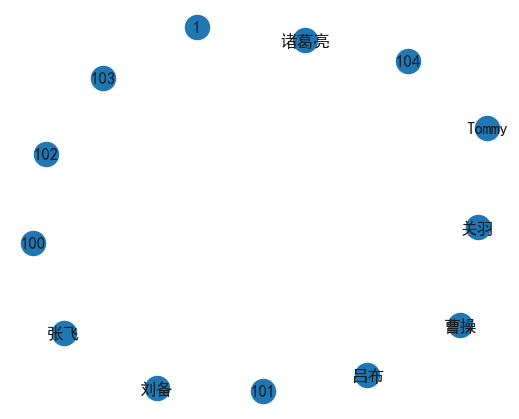

In [125]:
# 可视化
nx.draw(G, with_labels=True)

### 创建另一个首尾相连成串的Path Graph

In [127]:
H = nx.path_graph(10)

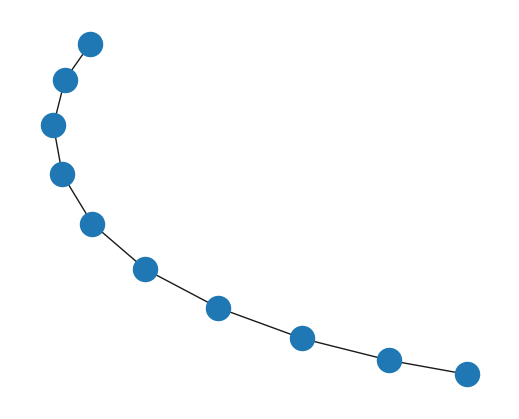

In [128]:
# 可视化
nx.draw(H)

In [129]:
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [130]:
### 将H的结点添加到G中

In [131]:
G.add_nodes_from(H)

In [132]:
G.nodes

NodeView(('刘备', 'Tommy', 1, '诸葛亮', '曹操', 100, 101, 102, 103, 104, '关羽', '张飞', '吕布', 0, 2, 3, 4, 5, 6, 7, 8, 9))

In [133]:
len(G)

22

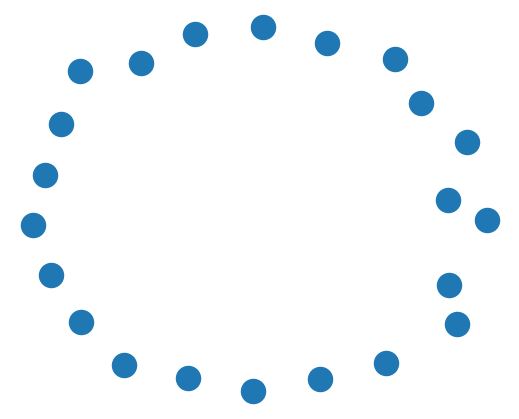

In [135]:
nx.draw(G)

### 将H本身作为结点添加到G中

In [137]:
G.add_node(H)

In [138]:
G.nodes

NodeView(('刘备', 'Tommy', 1, '诸葛亮', '曹操', 100, 101, 102, 103, 104, '关羽', '张飞', '吕布', 0, 2, 3, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x000001FA6B907E80>))

In [139]:
len(G)

23

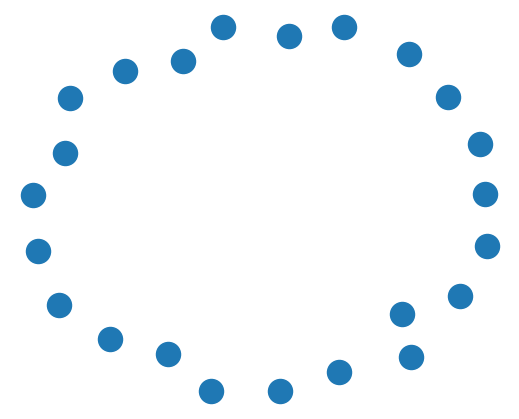

In [140]:
nx.draw(G)

### 小贴士
结点可以是任意可哈希的对象，比如字符串、图像、XML对象、甚至另一个graph、自定义的节点对象
通过这种方式，你可以根据你的应用、自由灵活的构建，图为结点、文件为结点、函数为结点等灵活的图形式

### 创建连接

In [143]:
#### 创建无向图
G = nx.Graph()
print(G.is_directed())

False


In [144]:
# 给整张图添加特征属性
G.graph['Name'] = 'hello world'
print(G.graph)

{'Name': 'hello world'}


In [145]:
# 创建有向图
H = nx.DiGraph()
H.is_directed()

True

### 创建单个结点
####### 特征属性的名字可以随便起

In [147]:
# 创建0号结点，并添加特征属性
G.add_node(0, feature=5, label=0, wudi=2)
G.nodes[0]

{'feature': 5, 'label': 0, 'wudi': 2}

#### 创建多个结点

In [149]:
G.add_nodes_from([
    (1, {'feature':1, 'label':2, 'wudi':3}),
    (2, {'feature':2, 'label':2, 'wudi':4})
])

#### 全图结点信息

In [153]:
G.number_of_nodes()

3

In [154]:
G.nodes

NodeView((0, 1, 2))

In [155]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0, 'wudi': 2}, 1: {'feature': 1, 'label': 2, 'wudi': 3}, 2: {'feature': 2, 'label': 2, 'wudi': 4}})

In [157]:
# 遍历所有结点，并输出结点对应的属性信息
for node in G.nodes(data=True):
    print(node)

(0, {'feature': 5, 'label': 0, 'wudi': 2})
(1, {'feature': 1, 'label': 2, 'wudi': 3})
(2, {'feature': 2, 'label': 2, 'wudi': 4})


#### 创建单个连接，设置属性特征
########## 特征属性的名字可以随便起

In [159]:
G.add_edge(0, 1, weight=0.5, like=3)

#### 创建多个连接

In [163]:
G.add_edges_from([
    (1, 2, {'weight':0.3, 'like':5}),
    (2, 0, {'weight':0.1, 'like':8})
])

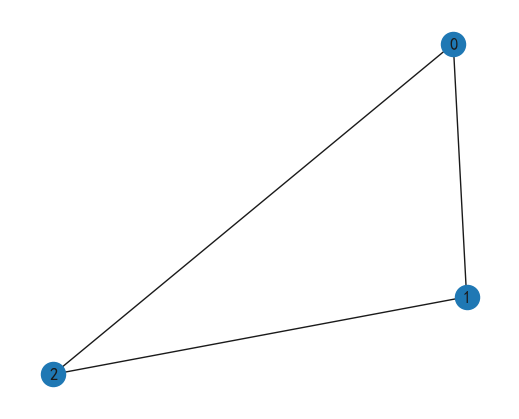

In [168]:
# 可视化
nx.draw(G, with_labels=True)

#### 全图连接信息

In [170]:
G.number_of_edges()

3

In [171]:
G.size()

3

In [172]:
G.edges()

EdgeView([(0, 1), (0, 2), (1, 2)])

In [173]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 0.5, 'like': 3}), (0, 2, {'weight': 0.1, 'like': 8}), (1, 2, {'weight': 0.3, 'like': 5})])

In [174]:
# 遍历所有连接，并输出连接对应的特征属性信息
for edge in G.edges(data=True):
    print(edge)

(0, 1, {'weight': 0.5, 'like': 3})
(0, 2, {'weight': 0.1, 'like': 8})
(1, 2, {'weight': 0.3, 'like': 5})


#### 结点的连接数（Node degree）

In [176]:
# 指定结点
node_id = 1

In [177]:
G.degree(node_id)

2

In [178]:
# 指定结点的所有相邻结点
for neighbor in G.neighbors(node_id):
    print(f'Node {node_id} has neighbour {neighbor}')

Node 1 has neighbour 0
Node 1 has neighbour 2


In [179]:
# nx.draw() 可视化函数

### 创建4x4网格图

In [181]:
G = nx.grid_2d_graph(4, 4)

### 原生可视化

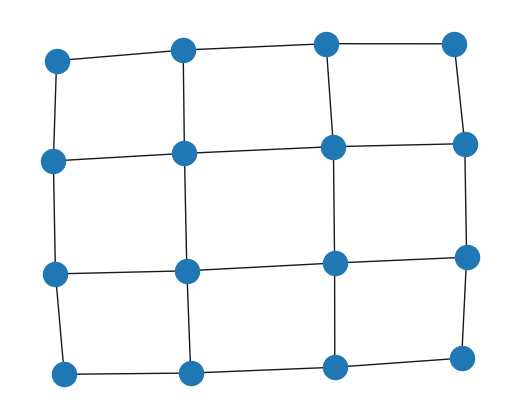

In [183]:
pos = nx.spring_layout(G, seed=123)
nx.draw(G, pos)

#### 不显示结点

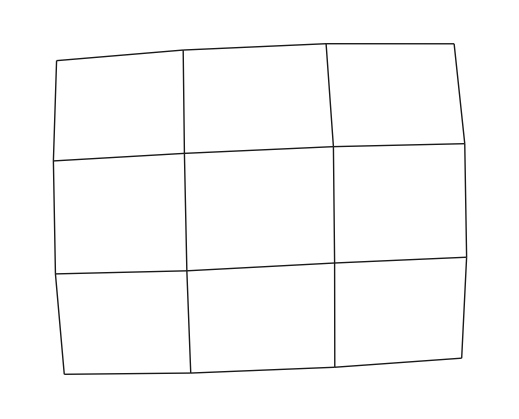

In [187]:
nx.draw(G, pos, node_size=0, with_labels=False)

#### 设置颜色

In [190]:
G.number_of_edges()

24

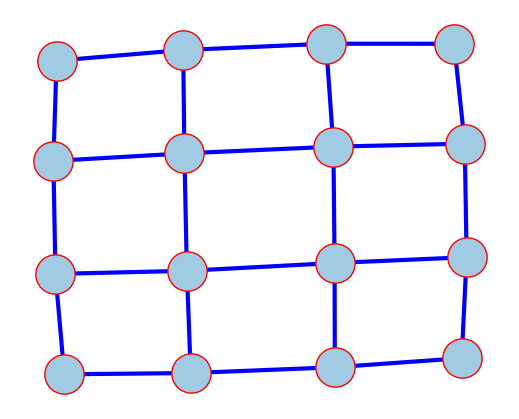

In [193]:
nx.draw(
    G,
    pos,
    node_color='#A0CBE2', # 结点颜色
    edgecolors='red',     # 结点外边缘颜色
    edge_color='blue',    # 边的颜色
    # edge_cmap = plt.cm.coolwarm  # 配色方案
    node_size=800,
    with_labels=False,
    width=3,
)

#### 有向图

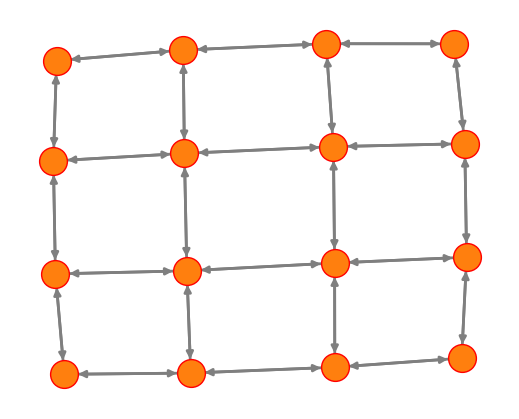

In [196]:
nx.draw(
    G.to_directed(),
    pos,
    node_color='tab:orange', # 结点颜色
    edgecolors='red',     # 结点外边缘颜色
    edge_color='tab:gray',    # 边的颜色
    # edge_cmap = plt.cm.coolwarm  # 配色方案
    node_size=400,
    with_labels=False,
    arrowsize=10,
    width=2,
)

### 设置每个结点的坐标

#### 无向图

In [209]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

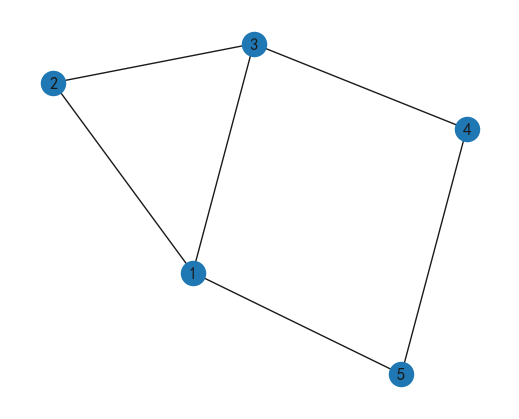

In [210]:
nx.draw(G, with_labels=True)

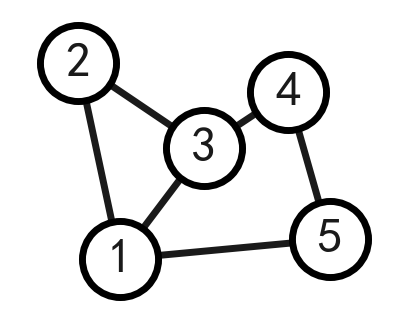

In [212]:
# 设置每个结点可视化时的坐标
pos = {1:(0, 0), 2:(-1, 0.3), 3:(2, 0.17), 4:(4, 0.255), 5:(5, 0.03)}

# 设置其可视化样式
options = {
    'font_size':36,
    'node_size':3000,
    'node_color':'white',
    'edgecolors':'black',
    'linewidths':5,  # 结点线宽
    'width':5
}

nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.2)
plt.axis('off')
plt.show()

In [216]:
#### 有向图
G = nx.DiGraph([(0,3),(1,3),(2,4),(3,5),(3,6),(4,6),(5,6)])

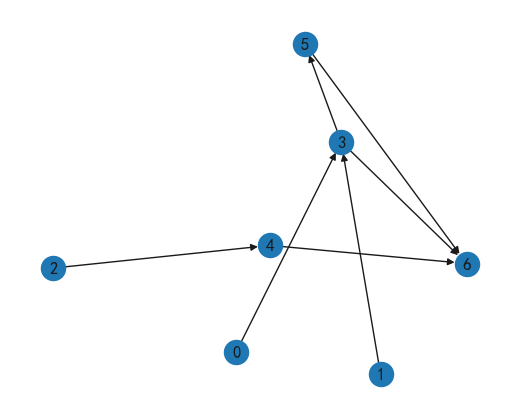

In [218]:
nx.draw(G, with_labels=True)

In [219]:
# 可视化时每一列包含的结点
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

In [220]:
# 可视化时每个结点的坐标
pos = {n:(0, i) for i, n in enumerate(left_nodes)}
pos.update({n:(1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n:(2, i + 0.5) for i, n in enumerate(right_nodes)})

In [221]:
pos

{0: (0, 0),
 1: (0, 1),
 2: (0, 2),
 3: (1, 0.5),
 4: (1, 1.5),
 5: (2, 0.5),
 6: (2, 1.5)}

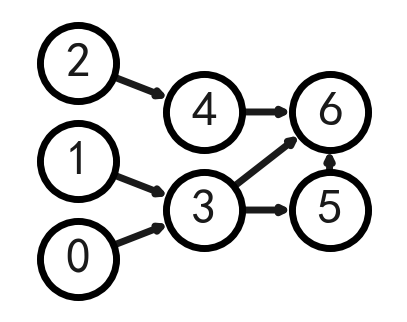

In [222]:
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.2)
plt.axis('off')
plt.show()

#### 再来一个案例

In [224]:
G = nx.house_graph()

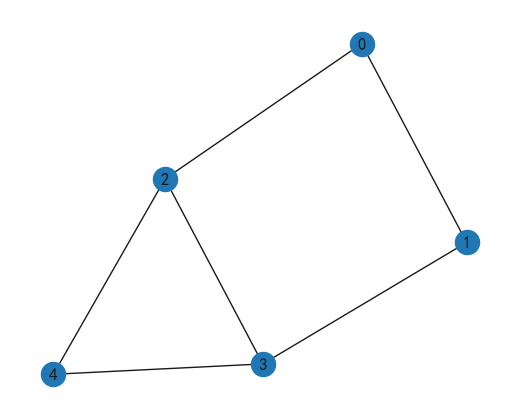

In [225]:
nx.draw(G, with_labels=True)

In [226]:
# 设置结点坐标
pos = {0:(0, 0), 1:(1, 0), 2:(0, 1), 3:(1, 1), 4:(0.5, 2.0)}

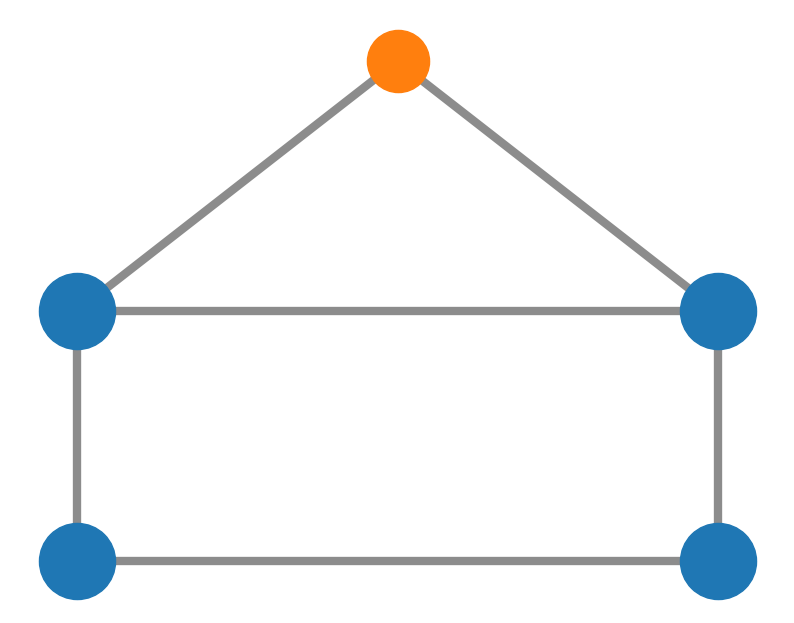

In [227]:
plt.figure(figsize=(10, 8))
# 绘制墙角的四个结点
nx.draw_networkx_nodes(G, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color='tab:blue')

# 绘制屋顶结点
nx.draw_networkx_nodes(G, pos, node_size=2000, nodelist=[4], node_color='tab:orange')

# 绘制连接
nx.draw_networkx_edges(G, pos, alpha=0.5, width=6)
plt.axis('off')
plt.show()

# 美国128城市交通关系无向图可视化


In [229]:
# 导入工具包
import networkx as nx
import numpy as np

import gzip
import re
import warnings
warnings.simplefilter('ignore')

#### 构建图

In [236]:
fh = gzip.open(r'./data/knuth_miles.txt.gz', 'r')

G = nx.Graph()
G.position = {}
G.population = {}

In [237]:
cities = []
for line in fh.readlines(): # 遍历文件中的每一行
    line = line.decode()
    if line.startswith('*'):
        continue
    
    numfind = re.compile(r"^\d+")
    
    if numfind.match(line): # 记录城市间距离的行
        dist = line.split()
        for d in dist:
            G.add_edge(city, cities[i], weight=int(d))
            i = i + 1
    else:
        i = 1
        (city, coordpop) = line.split("[")
        cities.insert(0, city)
        (coord, pop) = coordpop.split(']')
        (y, x) = coord.split(',')
        
        G.add_node(city)
        x = - float(x) / 100
        y = float(y) / 100 
        G.position[city] = (x, y)
        pop = float(pop) / 1000 
        G.population[city] = pop 

#### 查看图

In [239]:
print(G)

Graph with 128 nodes and 8128 edges


In [241]:
G.number_of_edges()

8128

In [242]:
G.number_of_nodes()

128

In [243]:
G.nodes()

NodeView(('Youngstown, OH', 'Yankton, SD', 'Yakima, WA', 'Worcester, MA', 'Wisconsin Dells, WI', 'Winston-Salem, NC', 'Winnipeg, MB', 'Winchester, VA', 'Wilmington, NC', 'Wilmington, DE', 'Williston, ND', 'Williamsport, PA', 'Williamson, WV', 'Wichita Falls, TX', 'Wichita, KS', 'Wheeling, WV', 'West Palm Beach, FL', 'Wenatchee, WA', 'Weed, CA', 'Waycross, GA', 'Wausau, WI', 'Waukegan, IL', 'Watertown, SD', 'Watertown, NY', 'Waterloo, IA', 'Waterbury, CT', 'Washington, DC', 'Warren, PA', 'Walla Walla, WA', 'Waco, TX', 'Vincennes, IN', 'Victoria, TX', 'Vicksburg, MS', 'Vancouver, BC', 'Valley City, ND', 'Valdosta, GA', 'Utica, NY', 'Uniontown, PA', 'Tyler, TX', 'Twin Falls, ID', 'Tuscaloosa, AL', 'Tupelo, MS', 'Tulsa, OK', 'Tucson, AZ', 'Trinidad, CO', 'Trenton, NJ', 'Traverse City, MI', 'Toronto, ON', 'Topeka, KS', 'Toledo, OH', 'Texarkana, TX', 'Terre Haute, IN', 'Tampa, FL', 'Tallahassee, FL', 'Tacoma, WA', 'Syracuse, NY', 'Swainsboro, GA', 'Sumter, SC', 'Stroudsburg, PA', 'Stockton, 

In [244]:
#### 128城市经纬度坐标
G.position

{'Youngstown, OH': (-80.65, 41.1),
 'Yankton, SD': (-97.39, 42.88),
 'Yakima, WA': (-120.51, 46.6),
 'Worcester, MA': (-71.8, 42.27),
 'Wisconsin Dells, WI': (-89.77, 43.63),
 'Winston-Salem, NC': (-80.25, 36.1),
 'Winnipeg, MB': (-97.15, 49.88),
 'Winchester, VA': (-78.16, 39.19),
 'Wilmington, NC': (-77.92, 34.24),
 'Wilmington, DE': (-75.55, 39.75),
 'Williston, ND': (-103.62, 48.15),
 'Williamsport, PA': (-77.0, 41.25),
 'Williamson, WV': (-82.28, 37.68),
 'Wichita Falls, TX': (-98.49, 33.9),
 'Wichita, KS': (-97.34, 37.69),
 'Wheeling, WV': (-80.72, 40.07),
 'West Palm Beach, FL': (-80.05, 26.72),
 'Wenatchee, WA': (-120.32, 47.42),
 'Weed, CA': (-122.39, 41.42),
 'Waycross, GA': (-82.35, 31.22),
 'Wausau, WI': (-89.64, 44.96),
 'Waukegan, IL': (-87.83, 42.36),
 'Watertown, SD': (-97.11, 44.9),
 'Watertown, NY': (-75.92, 43.98),
 'Waterloo, IA': (-92.34, 42.5),
 'Waterbury, CT': (-73.05, 41.55),
 'Washington, DC': (-77.03, 38.89),
 'Warren, PA': (-79.14, 41.85),
 'Walla Walla, WA'

#### 128城市人口数据

In [246]:
G.population

{'Youngstown, OH': 115.436,
 'Yankton, SD': 12.011,
 'Yakima, WA': 49.826,
 'Worcester, MA': 161.799,
 'Wisconsin Dells, WI': 2.521,
 'Winston-Salem, NC': 131.885,
 'Winnipeg, MB': 564.473,
 'Winchester, VA': 20.217,
 'Wilmington, NC': 139.238,
 'Wilmington, DE': 70.195,
 'Williston, ND': 13.336,
 'Williamsport, PA': 33.401,
 'Williamson, WV': 5.219,
 'Wichita Falls, TX': 94.201,
 'Wichita, KS': 279.835,
 'Wheeling, WV': 43.07,
 'West Palm Beach, FL': 63.305,
 'Wenatchee, WA': 17.257,
 'Weed, CA': 2.879,
 'Waycross, GA': 19.371,
 'Wausau, WI': 32.426,
 'Waukegan, IL': 67.653,
 'Watertown, SD': 15.649,
 'Watertown, NY': 27.861,
 'Waterloo, IA': 75.985,
 'Waterbury, CT': 103.266,
 'Washington, DC': 638.432,
 'Warren, PA': 12.146,
 'Walla Walla, WA': 25.618,
 'Waco, TX': 101.261,
 'Vincennes, IN': 20.857,
 'Victoria, TX': 50.695,
 'Vicksburg, MS': 25.434,
 'Vancouver, BC': 414.281,
 'Valley City, ND': 7.774,
 'Valdosta, GA': 37.596,
 'Utica, NY': 75.632,
 'Uniontown, PA': 14.51,
 'Tyler, 

#### 128城市互联互通关系

In [249]:
# G.edges  # 行太多这里先不打印

#### 纽约到里士满的交通距离

In [251]:
G.edges[('Rochester, NY', 'Richmond, VA')]

{'weight': 486}

#### 筛选出距离小于指定阈值的城市

In [256]:
H = nx.Graph()
for v in G:
    H.add_node(v)
for (u, v, d) in G.edges(data=True):
    if d['weight'] < 800:
        H.add_edge(u, v)

#### 可视化

In [260]:
# 结点颜色-结点度
node_color = [float(H.degree(v)) for v in H]

# 结点尺寸-结点人口
node_size = [G.population[v] for v in H]

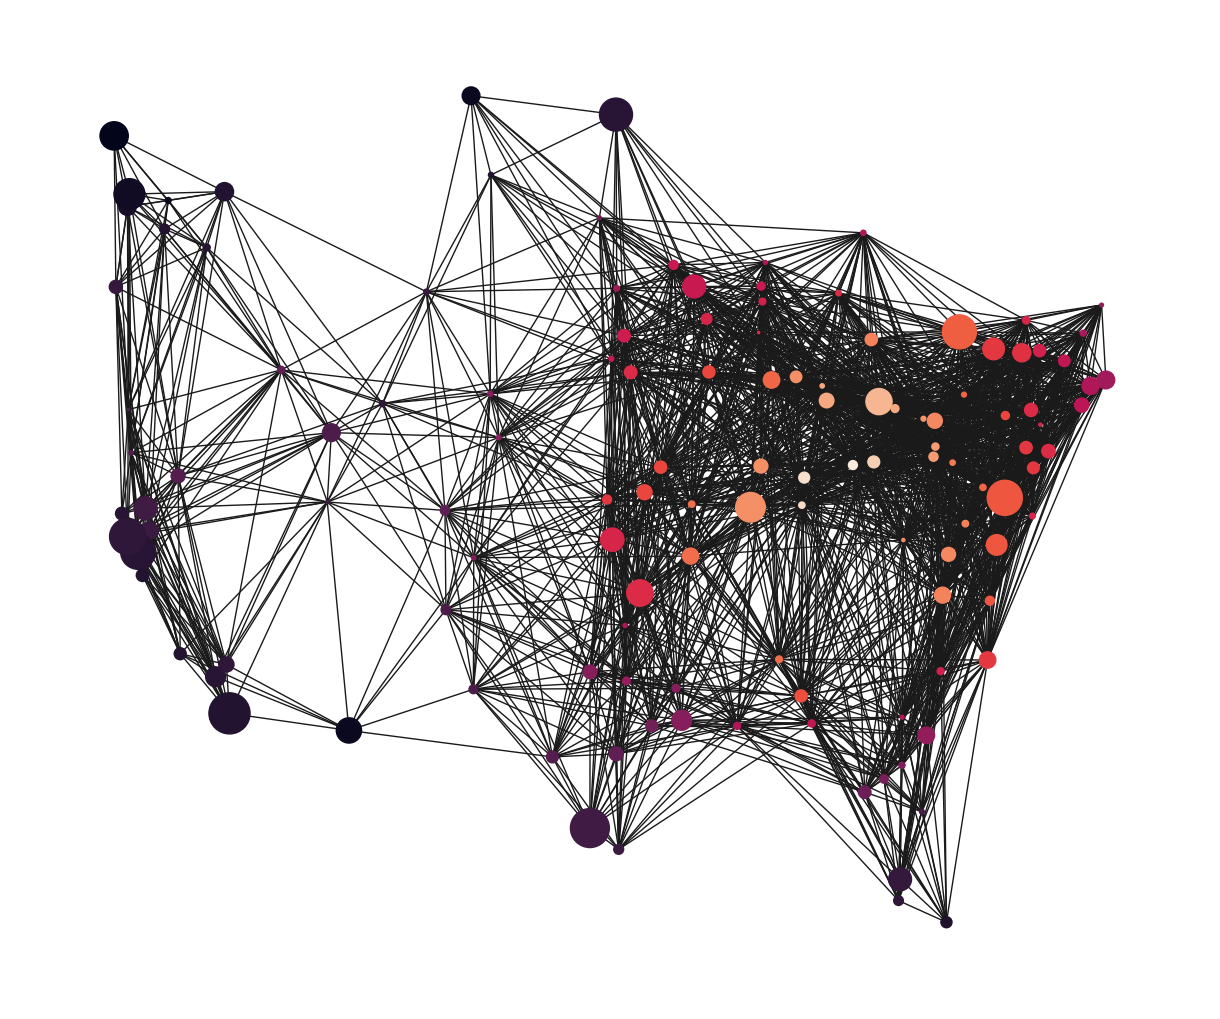

In [261]:
fig = plt.figure(figsize=(12, 10))
nx.draw(
    H,
    G.position,
    node_size = node_size,
    node_color = node_color,
    with_labels=False
)
plt.show()

In [262]:
# 有向图可视化模板
import matplotlib as mlp

#### 创建有向图

In [264]:
seed = 13648
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

#### 初步可视化

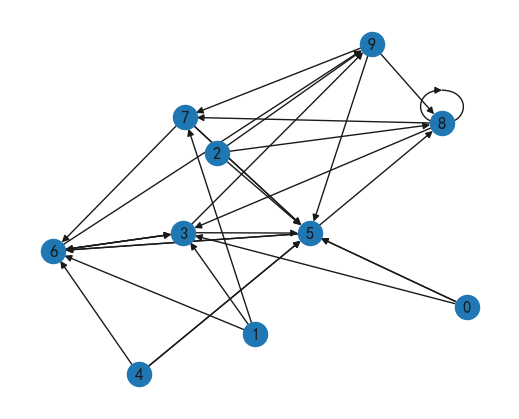

In [266]:
nx.draw(G, pos, with_labels=True)

#### 高级可视化设置

In [269]:
# 节点大小
node_sizes = [12 + 10 * i  for i in range(len(G))]

In [270]:
node_sizes

[12, 22, 32, 42, 52, 62, 72, 82, 92, 102]

In [271]:
# 结点颜色
M = G.number_of_edges()
edge_colors = range(2, M + 2)

In [272]:
edge_colors

range(2, 32)

In [273]:
# 结点透明度
edge_alphas = [(5 + i) / ( M + 4) for i in range(M)]

In [274]:
edge_alphas

[0.14705882352941177,
 0.17647058823529413,
 0.20588235294117646,
 0.23529411764705882,
 0.2647058823529412,
 0.29411764705882354,
 0.3235294117647059,
 0.35294117647058826,
 0.38235294117647056,
 0.4117647058823529,
 0.4411764705882353,
 0.47058823529411764,
 0.5,
 0.5294117647058824,
 0.5588235294117647,
 0.5882352941176471,
 0.6176470588235294,
 0.6470588235294118,
 0.6764705882352942,
 0.7058823529411765,
 0.7352941176470589,
 0.7647058823529411,
 0.7941176470588235,
 0.8235294117647058,
 0.8529411764705882,
 0.8823529411764706,
 0.9117647058823529,
 0.9411764705882353,
 0.9705882352941176,
 1.0]

In [275]:
# 配色方案
cmap = plt.cm.plasma

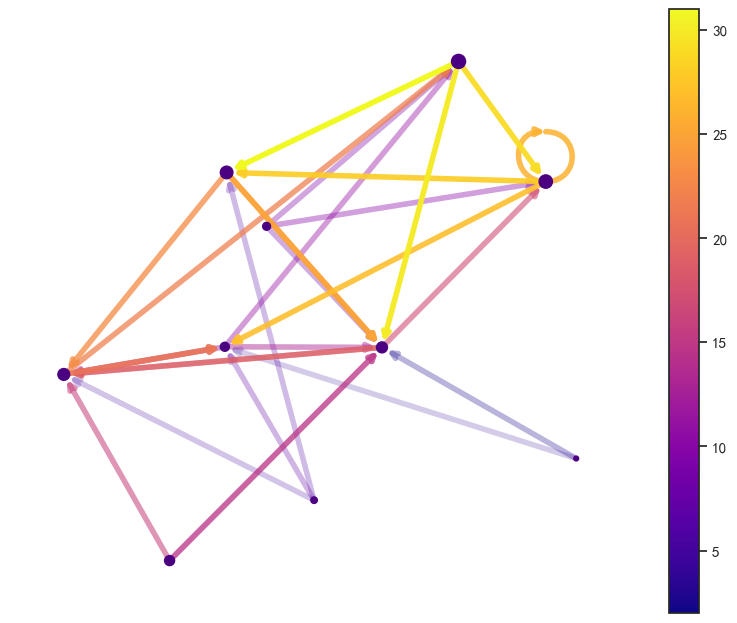

In [277]:
plt.figure(figsize=(10, 8))

# 绘制结点
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='indigo')

# 绘制连接
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size = node_sizes,
    arrowstyle='->',
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=4
)

# 设置每个连接的透明度
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])
    
# 调色图例
pc = mlp.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

# 国际象棋对局MultiGraph多路图可视化

In [279]:
def chess_pgn_graph(pgn_file="./data/chess_masters_WCC.pgn.bz2"):
    """Read chess games in pgn format in pgn_file.
    Filenames ending in .bz2 will be uncompressed.
    Return the MultiDiGraph of players connected by a chess game.
    Edges contain game data in a dict.
    """
    import bz2

    G = nx.MultiDiGraph()
    game = {}
    with bz2.BZ2File(pgn_file) as datafile:
        lines = [line.decode().rstrip("\r\n") for line in datafile]
    for line in lines:
        if line.startswith("["):
            tag, value = line[1:-1].split(" ", 1)
            game[str(tag)] = value.strip('"')
        else:
            # empty line after tag set indicates
            # we finished reading game info
            if game:
                white = game.pop("White")
                black = game.pop("Black")
                G.add_edge(white, black, **game)
                game = {}
    return G

In [280]:
# 导入数据
G = chess_pgn_graph()

In [283]:
G.number_of_edges() # 对局数

685

In [285]:
G.number_of_nodes() # 棋手数

25

In [286]:
G.nodes

NodeView(('Zukertort, Johannes H', 'Steinitz, Wilhelm', 'Chigorin, Mikhail I', 'Gunsberg, Isidor A', 'Lasker, Emanuel', 'Marshall, Frank J', 'Tarrasch, Siegbert', 'Janowski, Dawid M', 'Schlechter, Carl', 'Capablanca, Jose Raul', 'Alekhine, Alexander A', 'Bogoljubow, Efim D', 'Euwe, Max', 'Keres, Paul', 'Smyslov, Vassily V', 'Reshevsky, Samuel H', 'Botvinnik, Mikhail M', 'Bronstein, David I', 'Tal, Mikhail N', 'Petrosian, Tigran V', 'Spassky, Boris V', 'Fischer, Robert J', 'Korchnoi, Viktor L', 'Karpov, Anatoly', 'Kasparov, Gary'))

In [287]:
# 两个棋手之间的所有棋局
G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm')

{0: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.11',
  'Round': '1',
  'Result': '0-1',
  'ECO': 'D11',
  'EventDate': '1886.01.11'},
 1: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.15',
  'Round': '3',
  'Result': '1-0',
  'ECO': 'D10',
  'EventDate': '1886.01.11'},
 2: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.20',
  'Round': '5',
  'Result': '1-0',
  'ECO': 'D10',
  'EventDate': '1886.01.11'},
 3: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.02.05',
  'Round': '7',
  'Result': '0-1',
  'ECO': 'D40',
  'EventDate': '1886.01.11'},
 4: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.02.10',
  'Round': '9',
  'Result': '0-1',
  'ECO': 'D26',
  'EventDate': '1886.01.11'},
 5: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.03.01',
  'Round': '11',
  'Result': '0-1',
  'ECO': 'C49',
  'EventDate': '1886.01.11'},
 6: {'Event': 'World Champi

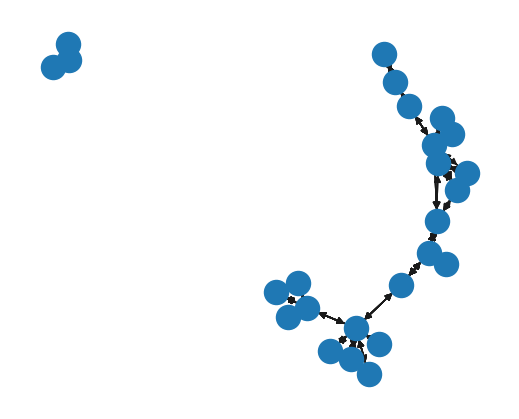

In [288]:
#### 初步可视化
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)

#### 连通域分析

In [290]:
# 将G转为无向图， 分析连通域
H = G.to_undirected()

In [291]:
for each in nx.connected_components(H):
    print('连通域')
    print(H.subgraph(each))
    print('包含结点')
    print(each)
    print('\n')

连通域
MultiGraph with 22 nodes and 304 edges
包含结点
{'Spassky, Boris V', 'Bronstein, David I', 'Capablanca, Jose Raul', 'Chigorin, Mikhail I', 'Tal, Mikhail N', 'Lasker, Emanuel', 'Botvinnik, Mikhail M', 'Steinitz, Wilhelm', 'Euwe, Max', 'Keres, Paul', 'Tarrasch, Siegbert', 'Smyslov, Vassily V', 'Marshall, Frank J', 'Zukertort, Johannes H', 'Reshevsky, Samuel H', 'Janowski, Dawid M', 'Alekhine, Alexander A', 'Schlechter, Carl', 'Bogoljubow, Efim D', 'Gunsberg, Isidor A', 'Petrosian, Tigran V', 'Fischer, Robert J'}


连通域
MultiGraph with 3 nodes and 49 edges
包含结点
{'Korchnoi, Viktor L', 'Kasparov, Gary', 'Karpov, Anatoly'}




#### 高级可视化

In [293]:
# 将G转为无向-单连接图
H = nx.Graph(G)

In [294]:
H.edges

EdgeView([('Zukertort, Johannes H', 'Steinitz, Wilhelm'), ('Steinitz, Wilhelm', 'Chigorin, Mikhail I'), ('Steinitz, Wilhelm', 'Gunsberg, Isidor A'), ('Steinitz, Wilhelm', 'Lasker, Emanuel'), ('Lasker, Emanuel', 'Marshall, Frank J'), ('Lasker, Emanuel', 'Tarrasch, Siegbert'), ('Lasker, Emanuel', 'Janowski, Dawid M'), ('Lasker, Emanuel', 'Schlechter, Carl'), ('Lasker, Emanuel', 'Capablanca, Jose Raul'), ('Capablanca, Jose Raul', 'Alekhine, Alexander A'), ('Alekhine, Alexander A', 'Bogoljubow, Efim D'), ('Alekhine, Alexander A', 'Euwe, Max'), ('Euwe, Max', 'Keres, Paul'), ('Euwe, Max', 'Smyslov, Vassily V'), ('Euwe, Max', 'Botvinnik, Mikhail M'), ('Euwe, Max', 'Reshevsky, Samuel H'), ('Keres, Paul', 'Smyslov, Vassily V'), ('Keres, Paul', 'Botvinnik, Mikhail M'), ('Keres, Paul', 'Reshevsky, Samuel H'), ('Smyslov, Vassily V', 'Reshevsky, Samuel H'), ('Smyslov, Vassily V', 'Botvinnik, Mikhail M'), ('Reshevsky, Samuel H', 'Botvinnik, Mikhail M'), ('Botvinnik, Mikhail M', 'Bronstein, David I')

In [295]:
# 两个棋手的所有棋局
len(G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm'))

10

In [298]:
# 两个棋手之间的连接宽度 与 棋局个数 成正比
edgewidth = [len(G.get_edge_data(u, v)) for u, v in H.edges()]

In [299]:
edgewidth

[10,
 19,
 10,
 9,
 7,
 8,
 11,
 5,
 7,
 17,
 26,
 27,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 37,
 2,
 12,
 21,
 11,
 23,
 11,
 25,
 24]

In [304]:
# 棋手结点的大小 与 赢棋次数 成正比
wins = dict.fromkeys(G.nodes(), 0)  # 生成每个棋手作为key的dict
for (u, v, d) in G.edges(data=True):
    r = d['Result'].split('-')
    if r[0] == '1':
        wins[u] += 1.0
    elif r[0] == '1/2':
        wins[u] += 0.5
        wins[v] += 0.5
    else:
        wins[v] += 1.0
nodesize = [wins[v] * 50 for v in H]

In [305]:
wins

{'Zukertort, Johannes H': 7.5,
 'Steinitz, Wilhelm': 53.0,
 'Chigorin, Mikhail I': 17.0,
 'Gunsberg, Isidor A': 8.5,
 'Lasker, Emanuel': 61.5,
 'Marshall, Frank J': 3.5,
 'Tarrasch, Siegbert': 5.5,
 'Janowski, Dawid M': 3.5,
 'Schlechter, Carl': 5.0,
 'Capablanca, Jose Raul': 24.5,
 'Alekhine, Alexander A': 79.5,
 'Bogoljubow, Efim D': 20.0,
 'Euwe, Max': 29.0,
 'Keres, Paul': 10.5,
 'Smyslov, Vassily V': 46.0,
 'Reshevsky, Samuel H': 10.5,
 'Botvinnik, Mikhail M': 89.0,
 'Bronstein, David I': 12.0,
 'Tal, Mikhail N': 20.5,
 'Petrosian, Tigran V': 35.5,
 'Spassky, Boris V': 32.5,
 'Fischer, Robert J': 12.5,
 'Korchnoi, Viktor L': 23.0,
 'Karpov, Anatoly': 52.0,
 'Kasparov, Gary': 23.0}

In [307]:
# 布局
pos = nx.kamada_kawai_layout(H)

# 手动微调节结点的横坐标（越大越靠右），纵坐标（越大越靠下）
pos['Reshevsky, Samuel H'] += (0.05, -0.10)
pos['Botvinnik, Mikhail M'] += (0.03, -0.06)
pos['Smyslov, Vassily V'] += (0.05, -0.03)

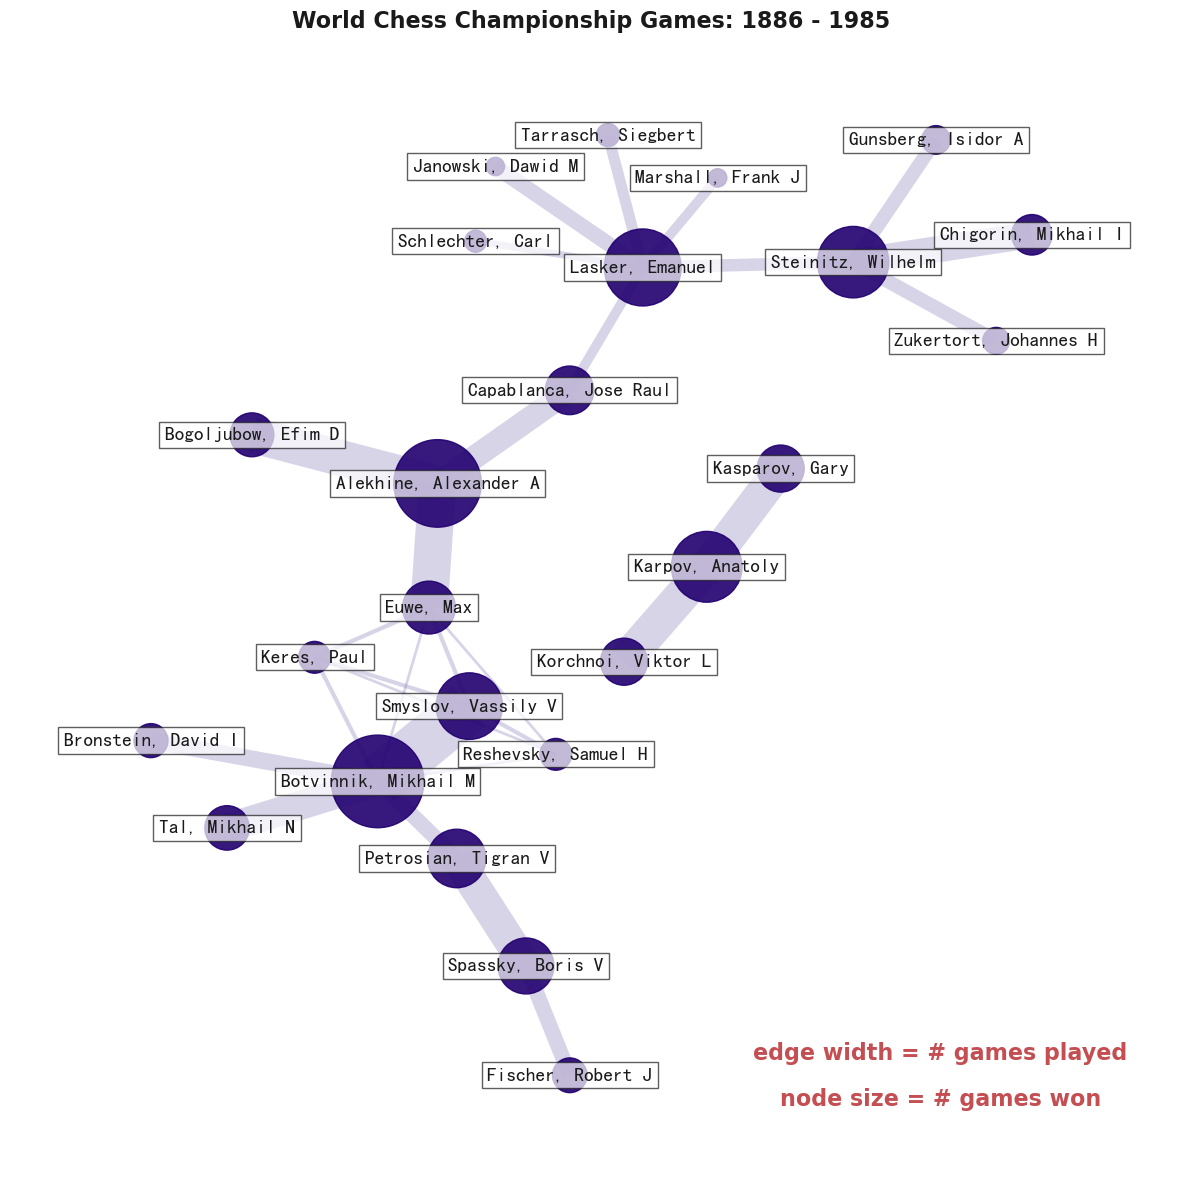

In [310]:
fig, ax = plt.subplots(figsize=(12, 12))

# 可视化连接
nx.draw_networkx_edges(H, pos, alpha=0.3, width=edgewidth, edge_color='m')

# 可视化结点
nx.draw_networkx_nodes(H, pos, node_size=nodesize, node_color='#210070', alpha=0.9)

# 节点名称文字说明
label_options = {'ec':'k', 'fc': 'white', 'alpha':0.7}
nx.draw_networkx_labels(H, pos, font_size=14, bbox=label_options)

# 标题和图例
font = {'fontname':'Helvetica', 'color':'k', 'fontweight':'bold', 'fontsize':16}
ax.set_title('World Chess Championship Games: 1886 - 1985', font)

# 图例字体颜色
font['color'] = 'r'

# 文字说明
ax.text(
    0.80,
    0.10,
    "edge width = # games played",
    horizontalalignment='center',
    transform=ax.transAxes,
    fontdict=font
)

ax.text(
    0.80,
    0.06,
    "node size = # games won",
    horizontalalignment='center',
    transform=ax.transAxes,
    fontdict=font
)

# 调整图的大小， 提高可读性
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis('off')
plt.show()

# 自定义结点图标

In [312]:
import PIL

#### 自定义图标

In [326]:
# 先从网站上下载图标（www.flaticon.com）
icons = {
    'router':'./data/database.png',
    'switch':'./data/wifi.png',
    'PC':'./data/pc.png'
}

# 载入图像
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

In [327]:
images

{'router': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512 at 0x1FA6B923E50>,
 'switch': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512 at 0x1FA6B83F670>,
 'PC': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512 at 0x1FA6A381940>}

#### 创建图

In [332]:
# 创建空图
G = nx.Graph()

# 创建结点
G.add_node('router', image=images['router'])
for i in range(1, 4):
    G.add_node(f'switch-{i}', image=images['switch'])
    for j in range(1, 4):
        G.add_node(f'PC-{i}-{j}', image=images['PC'])
        
# 创建连接
G.add_edge('router', 'switch-1')
G.add_edge('router', 'switch-2')
G.add_edge('router', 'switch-3')
for u in range(1, 4):
    for v in range(1, 4):
        G.add_edge(f'switch-{u}', f'PC-{u}-{v}')

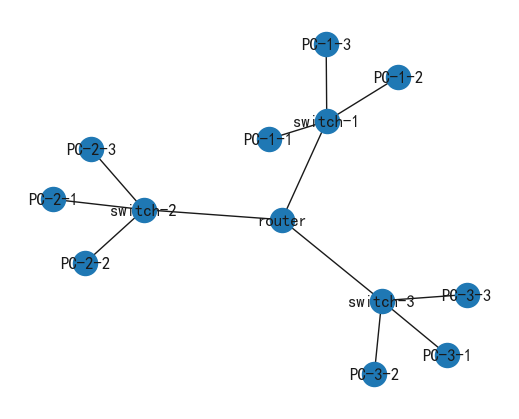

In [333]:
nx.draw(G, with_labels=True)

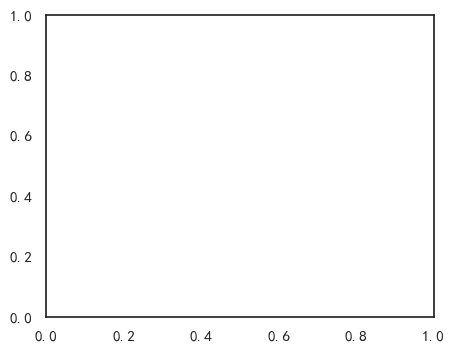

In [334]:
fig, ax = plt.subplots()

In [335]:
# 图片尺寸（相对于 X 轴）
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.04 
icon_center = icon_size / 2.0

#### 可视化自定义结点图标

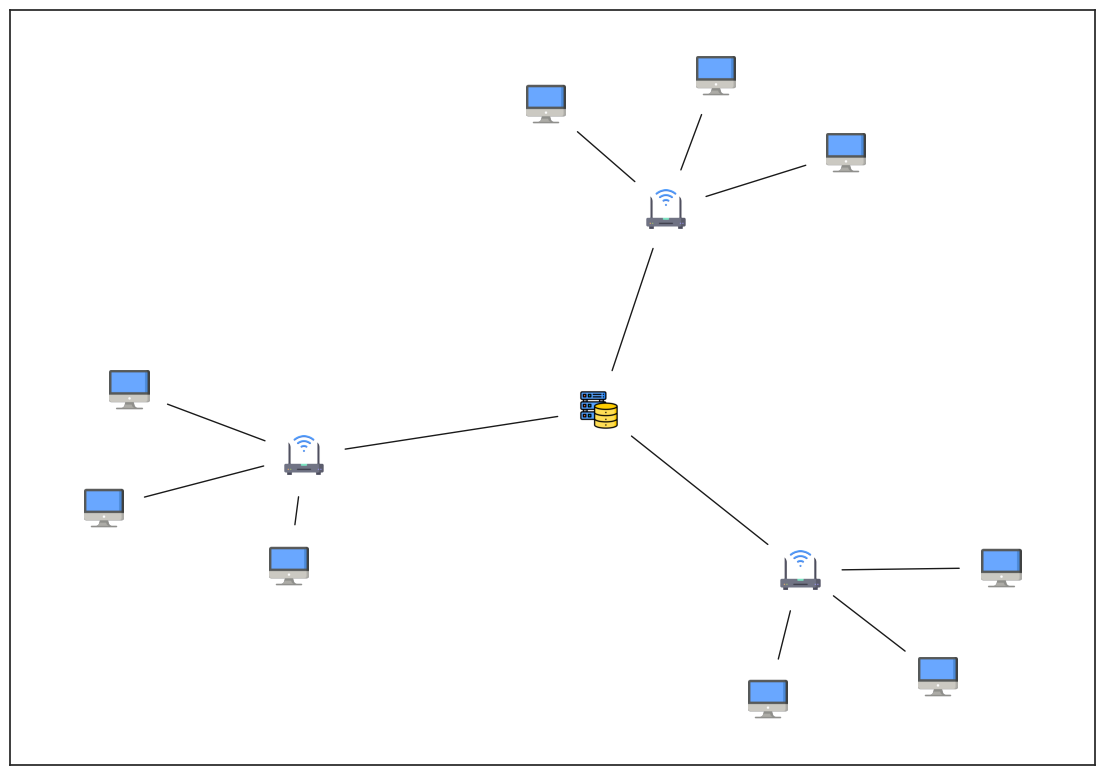

In [346]:
pos = nx.spring_layout(G, seed=2023)
fig, ax = plt.subplots(figsize=(14, 10))

# 绘制连接
nx.draw_networkx_edges(
    G,
    pos,
    arrows=True,
    arrowstyle='-',
    min_source_margin=30,
    min_target_margin=30
)

# 给每个结点添加各自的图片
for n in G.nodes():
    xf, yf = ax.transData.transform(pos[n]) # data坐标转display坐标
    xa, ya = fig.transFigure.inverted().transform((xf, yf)) # display坐标转figure坐标
    
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]['image'])
    a.axis('off')
plt.show()

# 自我中心图（Ego图）


In [348]:
# 导入工具包
from operator import itemgetter

In [349]:
#### 创建Barabasi-Albert无标度网络
'''
论文:Emergence of scaling in random networks.
n个结点逐渐生长，新节点与degree高的旧结点产生m条连接
'''


'\n论文:Emergence of scaling in random networks.\nn个结点逐渐生长，新节点与degree高的旧结点产生m条连接\n'

In [355]:
n = 1000
m = 2
seed = 23456
G = nx.barabasi_albert_graph(n, m, seed=seed)

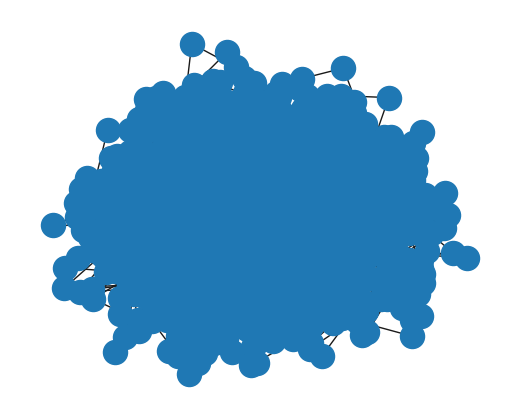

In [356]:
pos = nx.spring_layout(G, seed=seed)
nx.draw(G, pos)

#### 找到degree最大的主节点

In [358]:
largest_hub, degree = sorted(G.degree(), key=itemgetter(1))[-1]

In [359]:
largest_hub

3

In [360]:
degree

74

#### 找到以主节点为中心的邻域子图（Ego Graph）

In [363]:
hub_ego = nx.ego_graph(G, largest_hub, radius=1)

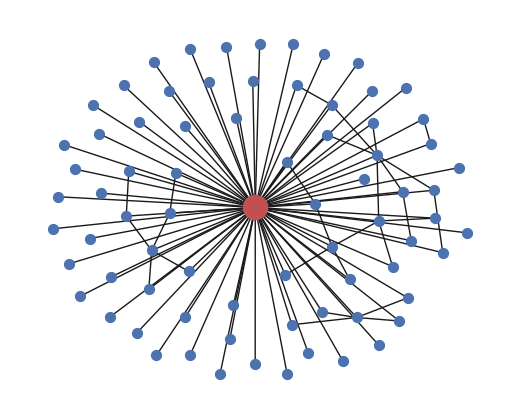

In [366]:
pos = nx.spring_layout(hub_ego, seed=seed)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)

# 大红显示主节点
options = {'node_size': 300, 'node_color': 'r'}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)

plt.show()